# Overview

The objective of this project is to understand and predict the emotion of people from facial images. We will build a system to identify the key facial points in an image as well as predict the emotion in that image. 

Source: https://www.kaggle.com/c/facial-keypoints-detection/overview

Source: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


In [1]:
#Mount the drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/facial-keypoints-detection

/content/drive/My Drive/facial-keypoints-detection


## IMPORT LIBRARIES

In [3]:
#Import the necessary packages

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# FACIAL KEY-POINT DETECTION:

In [4]:
#load the data

df = pd.read_csv('data.csv')

In [5]:
df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,24.972418,36.348203,56.402841,31.171586,80.709708,30.595738,38.187845,30.595738,17.275454,29.534964,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,15.979592,38.076531,56.941270,29.605102,81.314059,30.754762,35.059410,29.566780,8.578912,32.096032,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,21.621652,39.095524,62.388142,32.089787,85.829396,38.724104,42.595762,30.541779,11.230184,34.485512,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,16.850204,44.409861,51.463469,27.161327,77.354898,19.562755,34.135510,32.830102,9.731633,41.152347,54.075935,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


## DATA PRE-PROCESSING AND DATA EXPLORATION:

In [6]:
#Since values for the image is given as space separated string, separate the values using ' ' as separator.
#Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96,96)
df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [7]:
#Shape of the image
df['Image'][0].shape

(96, 96)

In [8]:
#Getting relavant information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [9]:
#Checking for null values
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

## PERFROM IMAGE VISUALIZATION

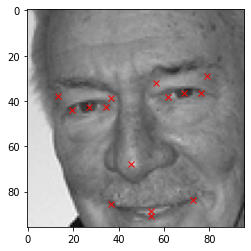

In [10]:
#Plotting a random image from the dataset along with facial keypoints. 
#Image data is obtained from df['Image'] and plotted using plt.imshow
#15 x and y coordinates for the corresponding image is obtained by using a for loop 
#which increments from 1 to 31 by 2. For example, in the first iteration j would be 1, followed by 3 and so on.
#since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
#we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.
#in the first iteration df[i][j-1] would be df[i][0] refering the value in 1st column(x-coordinate) of the image in 'i' row.

i = np.random.randint(1, len(df))
plt.imshow(df['Image'][i],cmap='gray')
for j in range(1,31,2):
        plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')


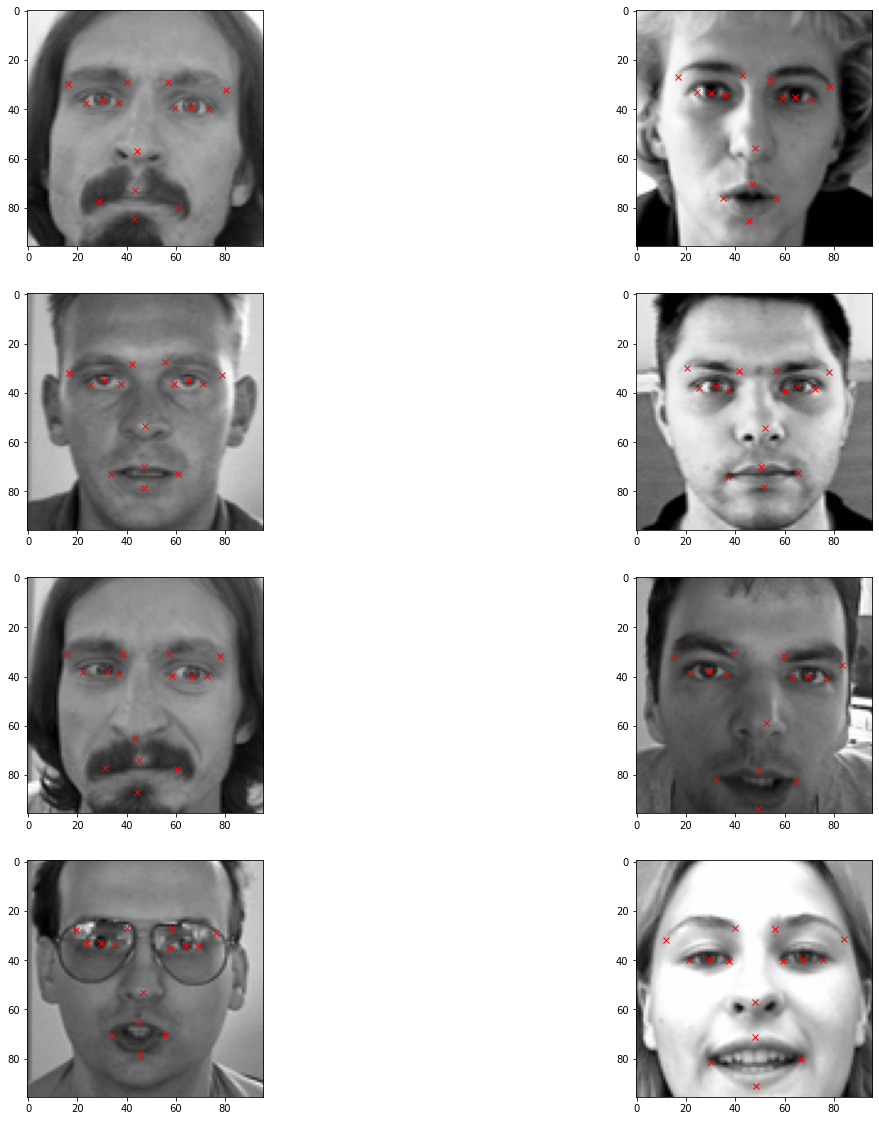

In [11]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)    
    image = plt.imshow(df['Image'][i],cmap='gray')
    for j in range(1,31,2):
        plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')
    

## PERFORM DATA AUGMENTATION

In [12]:
#Create a new copy of the dataframe
import copy
df_copy = copy.copy(df)

In [13]:
#Getting the columns in the dataframe

columns = df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [14]:
# Horizontal Flip - flip the images along y axis
df_copy['Image'] = df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

#since we are flipping horizontally, y coordinate values would be the same
#Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0:
    df_copy[columns[i]] = df_copy[columns[i]].apply(lambda x: 96. - float(x) )

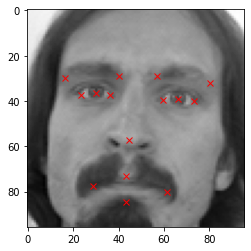

In [15]:
#Original image
plt.imshow(df['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df.loc[0][j-1], df.loc[0][j], 'rx')

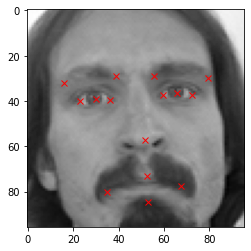

In [16]:
# Horizontally flipped image
plt.imshow(df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy.loc[0][j-1], df_copy.loc[0][j], 'rx')

In [17]:
# Concatenating original dataframe with the augmneted dataframe
augmented_df = np.concatenate((df,df_copy))

In [18]:
#Randomingly increasing the brightness
#We multiply pixel values by random values between 1 and 2 to increase the brightness of the image
#we clip the value between 0 and 255

import random

df_copy = copy.copy(df)
df_copy['Image'] = df['Image'].apply(lambda x:np.clip(random.uniform(1, 2)* x,0.0, 255.0))
augmented_df = np.concatenate((augmented_df,df_copy))
augmented_df.shape

(6420, 31)

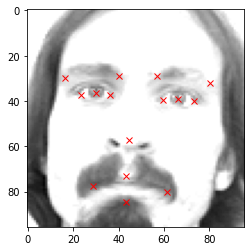

In [19]:
# Image with increased brightness

plt.imshow(df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy.loc[0][j-1], df_copy.loc[0][j], 'rx')

In [20]:
#Randomingly decreasing the brightness
#We multiply pixel values by random values between 0 and 1 to decrease the brightness of the image
#we clip the value between 0 and 255

df_copy = copy.copy(df)
df_copy['Image'] = df['Image'].apply(lambda x:np.clip(random.uniform(0, 1)* x,0.0, 255.0))
augmented_df = np.concatenate((augmented_df,df_copy))
augmented_df.shape

(8560, 31)

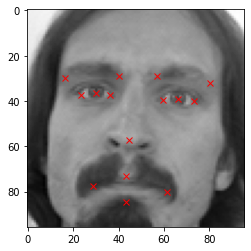

In [21]:
#Brightness decreased image

plt.imshow(df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy.loc[0][j-1], df_copy.loc[0][j], 'rx')

## PERFORM NORMALIZATION AND TRAIN DATA PREPARATION

In [22]:
# Reset the index for the augmented data frame
augmented_df.reset_index(drop=True, inplace=True)

#Gettin the value of images
img = augmented_df['Image']

#Normalizig the image
img = img/255.

#Creating an empty array of shape (8560,96,96,1) to feed to the model
X = np.empty((len(img), 96, 96, 1))

#Iterating through the img list and adding image values to the empty array after expanding it's dimension 
#from (96,96) to (96,96,1)

for i in range(len(img)):
    X[i,]= np.expand_dims(img[i], axis = 2)

#Converting the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [23]:
#Getting the value of coordinates, which are to used as target.
y = augmented_df.drop('Image', axis=1)
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [24]:
#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

## BUILD DEEP RESIDUAL NEURAL NETWORK MODEL

In [25]:
def res_block(X, filter, stage):
    #Convolutional_block
    
    X_copy = X

    f1 , f2, f3 = filter
    #Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


    #Short path

    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

    #ADD

    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    #Identity Block 1

    X_copy = X


      #Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    #ADD

    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    #Identity Block 2

    X_copy = X


      #Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

    #ADD

    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X

In [26]:
input_shape = (96,96,1)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)



#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

## COMPILE AND TRAIN DEEP LEARNING MODEL

In [27]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error",optimizer= adam , metrics = ['accuracy'])

In [28]:
#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights_keypoint.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs= 500, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/500
229/229 [==============================] - ETA: 0s - loss: 208.4460 - accuracy: 0.5663
Epoch 00001: val_loss improved from inf to 381.84671, saving model to weights_keypoint.hdf5
229/229 [==============================] - 7s 31ms/step - loss: 208.4460 - accuracy: 0.5663 - val_loss: 381.8467 - val_accuracy: 0.7073
Epoch 2/500
229/229 [==============================] - ETA: 0s - loss: 82.5061 - accuracy: 0.5918
Epoch 00002: val_loss improved from 381.84671 to 179.80434, saving model to weights_keypoint.hdf5
229/229 [==============================] - 6s 24ms/step - loss: 82.5061 - accuracy: 0.5918 - val_loss: 179.8043 - val_accuracy: 0.7047
Epoch 3/500
229/229 [==============================] - ETA: 0s - loss: 55.7921 - accuracy: 0.5860
Epoch 00003: val_loss improved from 179.80434 to 90.88885, saving model to weights_keypoint.hdf5
229/229 [==============================] - 6s 24ms/step - loss: 55.7921 - accuracy: 0.5860 - val_loss: 90.8888 - val_accuracy: 0.6891
Epoch 4/500
2

In [ ]:
#saving the model architecture to json file for future use

model_json = model.to_json()
with open("detection.json","w") as json_file:
    json_file.write(model_json)


In [29]:
with open('detection.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error",optimizer= adam , metrics = ['accuracy'])

# TASK #10: ASSESS THE PERFORMANCE OF THE TRAINED MODEL:

In [ ]:
#Evaluating the model

result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

27/27 [==============================] - 0s 14ms/step - loss: 29.4757 - accuracy: 0.8072
Accuracy : 0.8072429895401001


In [ ]:
#getting the model keys 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

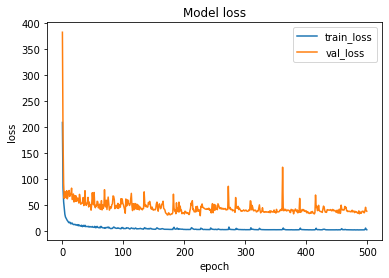

In [ ]:
#plotting the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# FACIAL EXPRESSION DETECTION:

## IMPORT DATASET FOR FACIAL EXPRESSION DETECTION

In [30]:
#reading the csv files

df = pd.read_csv('icml_face_data.csv')

In [31]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


## PERFORM DATA WRANGLING AND EDA

In [32]:
#function to convert pixel values in string format to array format

def string2array(x):
    return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [33]:
#Resize the image from (48,48) to (96,96)

def resize(x):
    img = x.reshape(48,48)
    return cv2.resize(img,dsize=(96, 96), interpolation=cv2.INTER_CUBIC)

In [34]:
df[' pixels'] = df[' pixels'].apply(lambda x: string2array(x))


In [35]:
df[' pixels'] = df[' pixels'].apply(lambda x: resize(x))

In [36]:
df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [37]:
#checking the shape of data_frame
df.shape

(24568, 2)

In [38]:
#checking for the presence of null values in the data frame
df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [39]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

# STEP #13: VISUALIZE DATASET

Text(0.5, 1.0, 'Number of images per emotion')

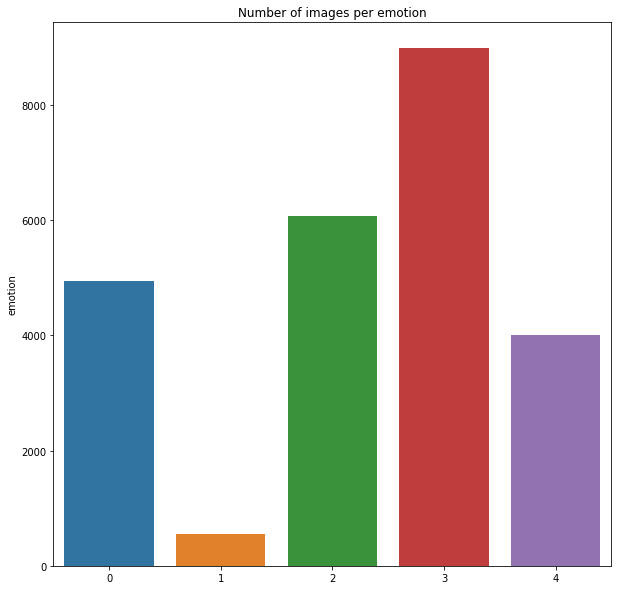

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x = df.emotion.value_counts().index, y = df.emotion.value_counts() )
plt.title('Number of images per emotion')


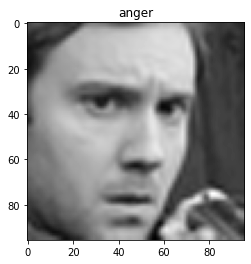

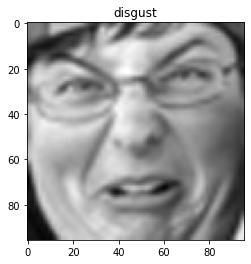

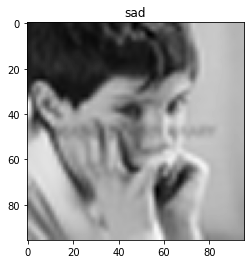

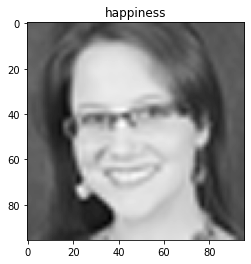

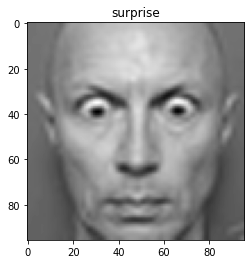

In [41]:
emotions = [0,1,2,3,4]

for i in emotions:
    data = df[df['emotion'] == i][:1]
    img = data[' pixels'].item()
    img = img.reshape(96,96)
    plt.figure()
    plt.title(label_to_text[i])
    plt.imshow(img, cmap= 'gray')

## DATA PREPARATION AND IMAGE AUGMETNATION:

In [42]:
#spliting the dataframe in to features and labels
from keras.utils import to_categorical

X = df[' pixels']
y = to_categorical(df['emotion'])

X = np.stack(X, axis=0)
X = X.reshape(24568,96,96,1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [43]:
#spliting the dataframe in to train,test and validation data frames

from sklearn.model_selection import train_test_split

X_train ,X_Test, y_train, y_Test= train_test_split(X,y,test_size = 0.1, shuffle = True)
X_val,X_Test, y_val,y_Test = train_test_split(X_Test,y_Test, test_size = 0.5, shuffle = True)


In [44]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [45]:
#image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [46]:
train_datagen = ImageDataGenerator(
rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode = "nearest"
)


## BUILD AND TRAIN DEEP LEARNING MODEL

In [48]:

input_shape = (96,96,1)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

#X = res_block(X, filter= [256,256,1024], stage= 4)



#Average Pooling

X = AveragePooling2D((4,4), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model_e = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_e.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 102, 102, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [49]:
# train the network
model_e.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [50]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights_emotions.hdf5", verbose=1, save_best_only=True)

In [51]:
history = model_e.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 50, callbacks=[checkpointer, earlystopping])

Epoch 1/50
345/345 [==============================] - ETA: 0s - loss: 1.2394 - accuracy: 0.5006
Epoch 00001: val_loss improved from inf to 1.70635, saving model to weights_emotions.hdf5
345/345 [==============================] - 51s 148ms/step - loss: 1.2394 - accuracy: 0.5006 - val_loss: 1.7063 - val_accuracy: 0.2785
Epoch 2/50
345/345 [==============================] - ETA: 0s - loss: 0.9075 - accuracy: 0.6416
Epoch 00002: val_loss improved from 1.70635 to 1.11750, saving model to weights_emotions.hdf5
345/345 [==============================] - 24s 70ms/step - loss: 0.9075 - accuracy: 0.6416 - val_loss: 1.1175 - val_accuracy: 0.5920
Epoch 3/50
345/345 [==============================] - ETA: 0s - loss: 0.8195 - accuracy: 0.6790
Epoch 00003: val_loss did not improve from 1.11750
345/345 [==============================] - 23s 67ms/step - loss: 0.8195 - accuracy: 0.6790 - val_loss: 1.1348 - val_accuracy: 0.5090
Epoch 4/50
345/345 [==============================] - ETA: 0s - loss: 0.7620 

In [52]:
#saving the model architecture to json file for future use

model_json = model_e.to_json()
with open("emotion.json","w") as json_file:
  json_file.write(model_json)

In [54]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_e = tf.keras.models.model_from_json(json_savedModel)
model_e.load_weights('weights_emotions.hdf5')
model_e.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# STEP#16: ACCESS THE PERFORMANCE OF THE MODEL

In [55]:
score = model_e.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 [==============================] - 0s 11ms/step - loss: 0.5917 - accuracy: 0.7811
Test Accuracy: 0.7811228632926941


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

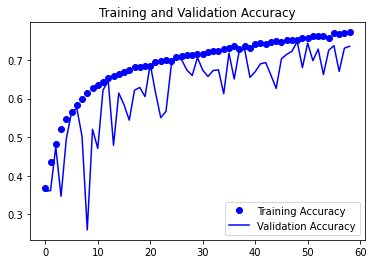

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

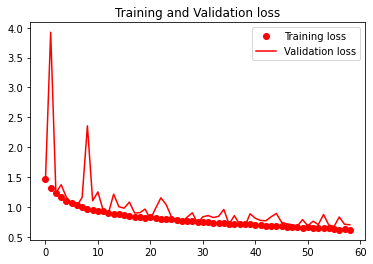

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [61]:
#predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_e.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

In [62]:
y_true.shape

(1229,)

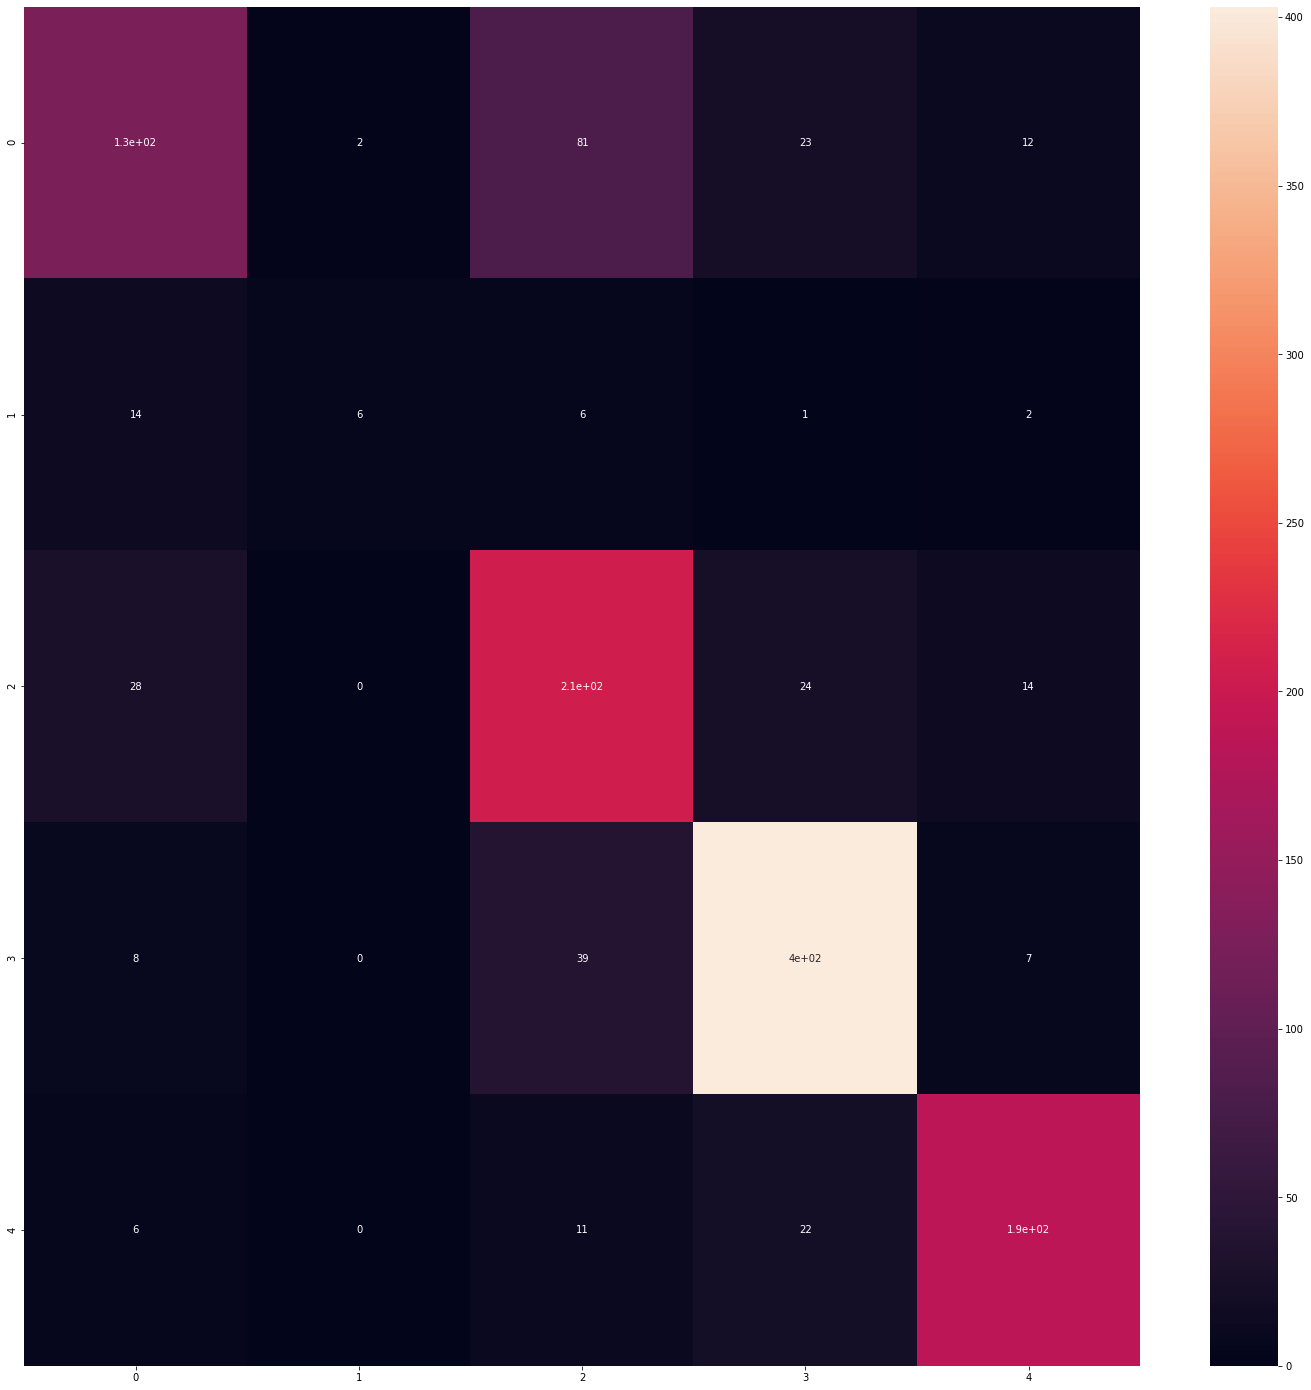

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

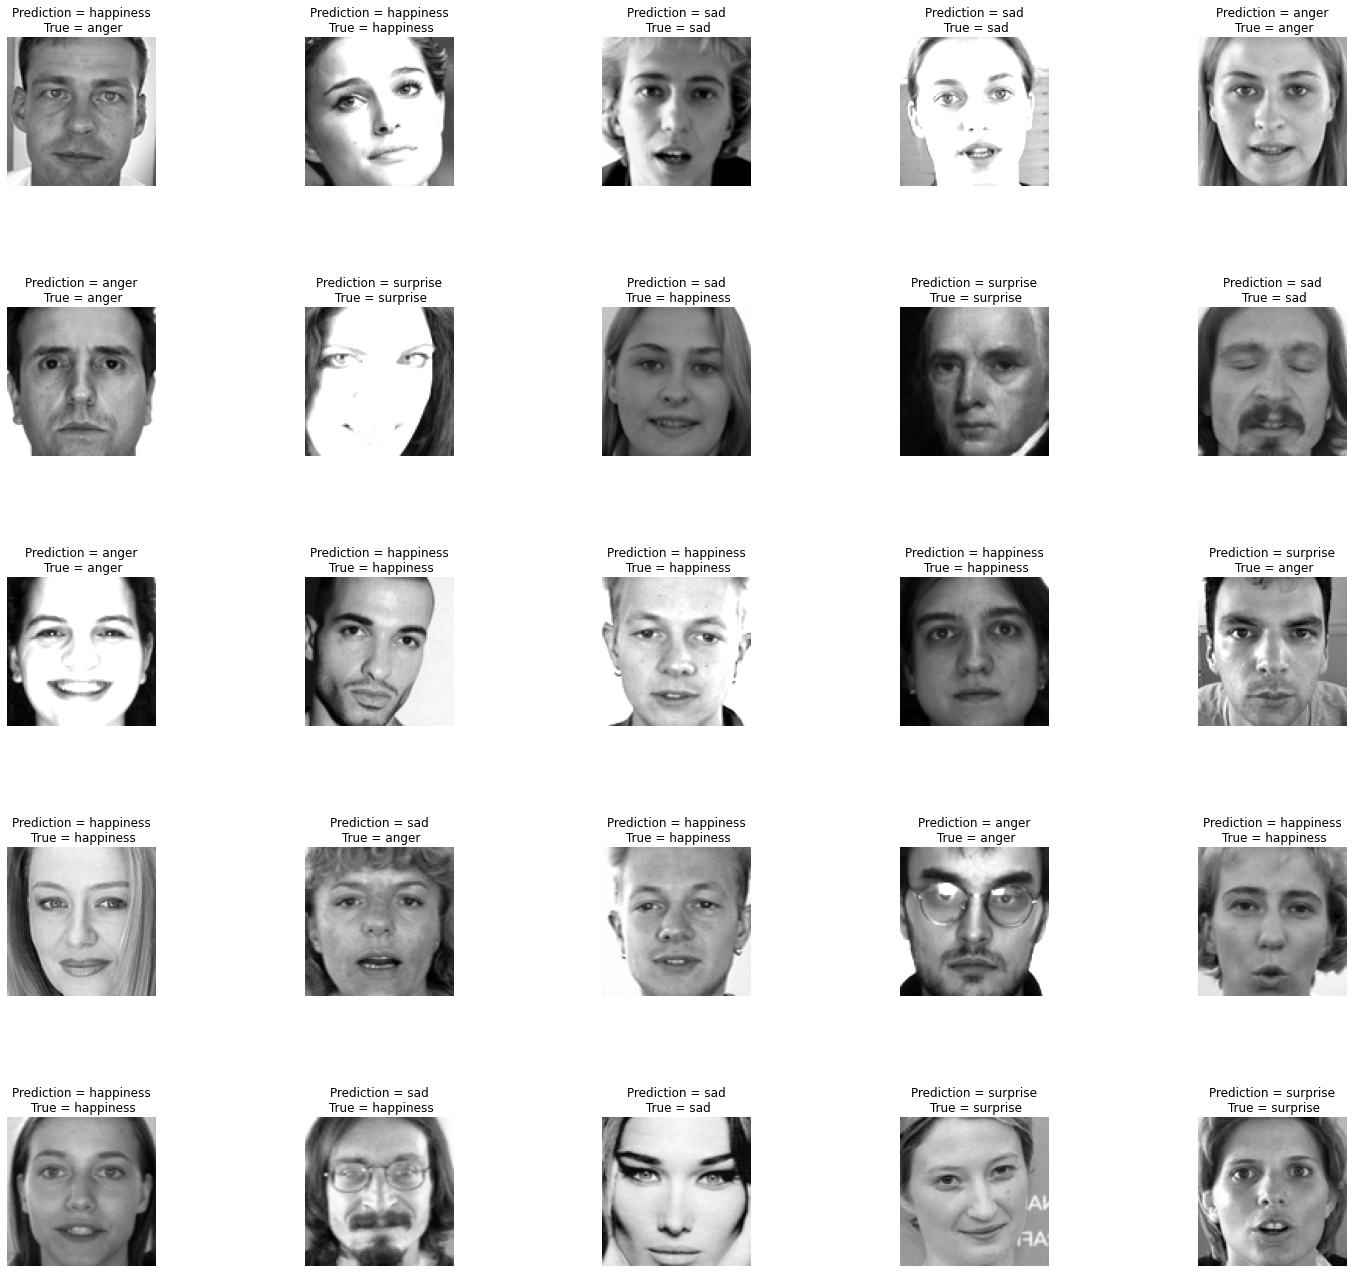

In [64]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# STEP #17: COMBINE THE OUTPUTS OF TWO MODELS:

In [118]:
def predict(X_test):
    #Making prediction from the keypoint model
    df_predict = model.predict(X_test)

    #Making prediction from the emotion model
    df_emotion = np.argmax(model_e.predict(X_test), axis=-1)

    #Reshaping array from (856,) to (856,1)
    df_emotion = np.expand_dims(df_emotion, axis = 1)

    #Converting the predictions into a dataframe
    df_predict= pd.DataFrame(df_predict, columns= columns)

    #Adding emotion into the predicted dataframe
    df_predict['emotion'] = df_emotion
    return df_predict

In [119]:
df_predict = predict(X_test)

In [120]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,28.517241,37.496029,67.745468,37.473114,37.535007,38.519451,18.821411,38.038124,58.592678,38.142643,77.140060,38.302345,41.229961,27.233583,11.839841,27.546329,57.014553,27.236923,84.209503,28.866060,49.657951,61.776814,28.851368,77.765076,67.709305,77.719307,49.028416,76.253090,48.759644,86.511917,3
1,66.785698,36.837177,30.515223,37.752579,60.976971,37.647785,72.606369,37.139996,36.219067,38.076633,24.339468,38.690807,56.292835,31.609331,78.473801,29.991455,38.877438,31.447254,17.543833,32.299221,51.429646,56.024883,64.881195,74.063446,36.530895,75.721748,50.906406,71.123543,51.247570,83.240547,0
2,66.848206,37.386120,31.063097,37.697742,61.009727,37.682964,72.961960,38.441273,36.550404,37.705006,24.800753,38.806141,55.839802,26.401745,78.736000,28.078201,41.592010,26.861584,18.656944,29.368361,46.975052,51.568298,61.911755,72.595123,33.023933,72.188385,46.586796,65.413277,46.686089,79.692513,2
3,66.854706,37.277992,31.442646,38.145222,59.324615,38.539967,73.613724,38.120098,38.099537,38.906036,23.319300,39.427937,55.533245,32.012764,78.890053,32.997158,40.915413,32.604279,17.139137,35.521854,49.472202,61.398483,64.299019,80.623672,34.841618,81.517700,49.609104,80.448547,49.552185,82.536903,0
4,66.524529,35.567753,30.714754,34.745483,60.604256,36.061287,71.789429,36.526787,36.234066,35.287083,24.705297,35.520439,56.865253,27.890045,78.506126,28.946785,40.745605,27.352146,17.807489,28.242907,49.038067,53.336578,60.153770,72.312912,34.867401,71.790611,47.801182,66.957649,47.605934,80.243446,3


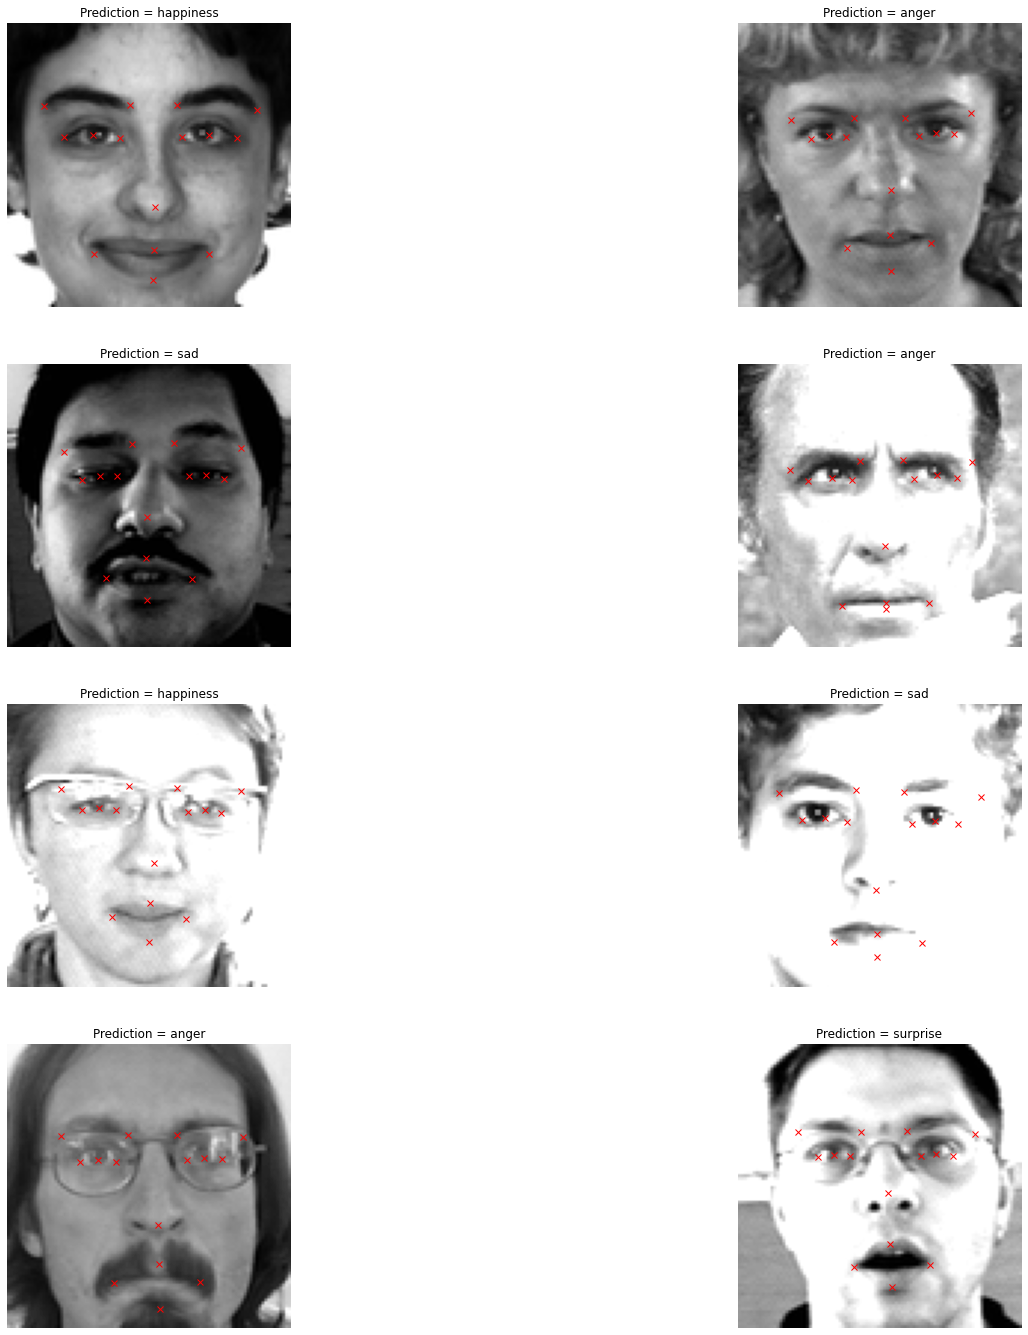

In [124]:
#Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(4, 2, figsize = (24, 24))
axes = axes.ravel()

for i in range(8):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
            

#STEP #18: GRADCAM VISUALIZATION

In [122]:
from PIL import Image, ImageOps

def grad_cam(img):

    #Covert the image to array of type float32
    img = np.asarray(img, dtype= np.float32)

    #Reshape the image from (96,96,1) to (1,96,96,1))
    img = img.reshape(-1,96,96,1)
    img_scaled = img / 255

    #Name of the layers we added to the base_model, you can find this in the model summaty
    #Every-time you run the model, check the summary, as the name would change or to avoid it 
    #you can add name to each layer
    classification_layers = ["Averagea_Pooling","Dense_final"]

    #Last convolutional layer in the base mdel, this woun't change as name has been already assigned to it.
    final_conv = model_e.get_layer("res_3_identity_2_c")

    #Create a model with original model input as input and the last conv_layer as the output
    final_conv_model = keras.Model(model_e.inputs, final_conv.output)

    #Then,we create the input for classification layer, which is the output of last conv layer
    #In our case, output produced by the conv layer is of the shape (1,2,2,1024) 
    #Since, the classification input needs the features as input, we ignore the batch dimension

    classification_input = keras.Input(shape=final_conv.output.shape[1:])

    # We iterate through the classification layers, to get the final layer and then, append 
    #the layer as the output layer to the classification model.
    temp = classification_input
    for layer in classification_layers:
          temp = model_e.get_layer(layer)(temp)
    classification_model = keras.Model(classification_input, temp)


    #We use gradient tape to monitor the 'final_conv_output' to retrive the gradients
    #corresponding to the predicted class
    with tf.GradientTape() as tape:
        # Pass the image through the base model and get the feature map 
        final_conv_output = final_conv_model(img_scaled)

        #Assign gradient tape to monitor the conv_output
        tape.watch(final_conv_output)

        #Pass the feature map through the classification model and use argmax to get the 
        #index of the predicted class and then use the index to get the value produced by final
        #layer for that class

        prediction = classification_model(final_conv_output)

        predicted_class = tf.argmax(prediction[0][0][0])

        predicted_class_value = prediction[:,:,:,predicted_class]

    #Get the gradient corresponding to the predicted class based on feature map.
    #which is of shape (1,2,2,1024)
    gradient = tape.gradient(predicted_class_value, final_conv_output)

    #Since we need the filter values (1024), we reduce the other dimensions, 
    #hich would result in a shape of (1024,)
    gradient_channels = tf.reduce_mean(gradient, axis=(0, 1, 2))

    #We then convert the feature map produced by last conv layer(1,2,2,1024) to (1,2,2,1024)

    final_conv_output = final_conv_output.numpy()[0]

    gradient_channels = gradient_channels.numpy()

    #We multiply the filters in the feature map produced by final conv layer by the 
    #filter values that are used to get the predicted class. By doing this we inrease the
    #value of areas that helped in making the prediction and lower the vlaue of areas, that 
    #did not contribute towards the final prediction
    for i in range(gradient_channels.shape[-1]):
        final_conv_output[:, :, i] *= gradient_channels[i]

    #We take the mean accross the channels to get the feature map
    heatmap = np.mean(final_conv_output, axis=-1)

    #Normalizing the heat map between 0 and 1, to visualize it
    heatmap_normalized = np.maximum(heatmap, 0) / np.max(heatmap)

    # Rescaling and converting the type to int
    heatmap = np.uint8(255 * heatmap_normalized )


    # Create the colormap
    color_map = plt.cm.get_cmap('jet')

    # get only the rb features from the heatmap
    color_map = color_map(np.arange(256))[:, :3]
    heatmap = color_map[heatmap]

    #convert the array to image, resize the image and then convert to array
    heatmap = keras.preprocessing.image.array_to_img(heatmap)
    heatmap = heatmap.resize((96 ,96))
    heatmap = np.asarray(heatmap, dtype = np.float32)

    #take the value of heat map along any one channel as or image is of 1 channel
    heatmap = heatmap[:,:,2]
    heatmap = np.expand_dims(heatmap, axis = 2) 

    final_img =  (img[0]*0.4) + ((heatmap/255.0) * 0.8)
    final_img = keras.preprocessing.image.array_to_img(final_img)

    return final_img, heatmap_normalized

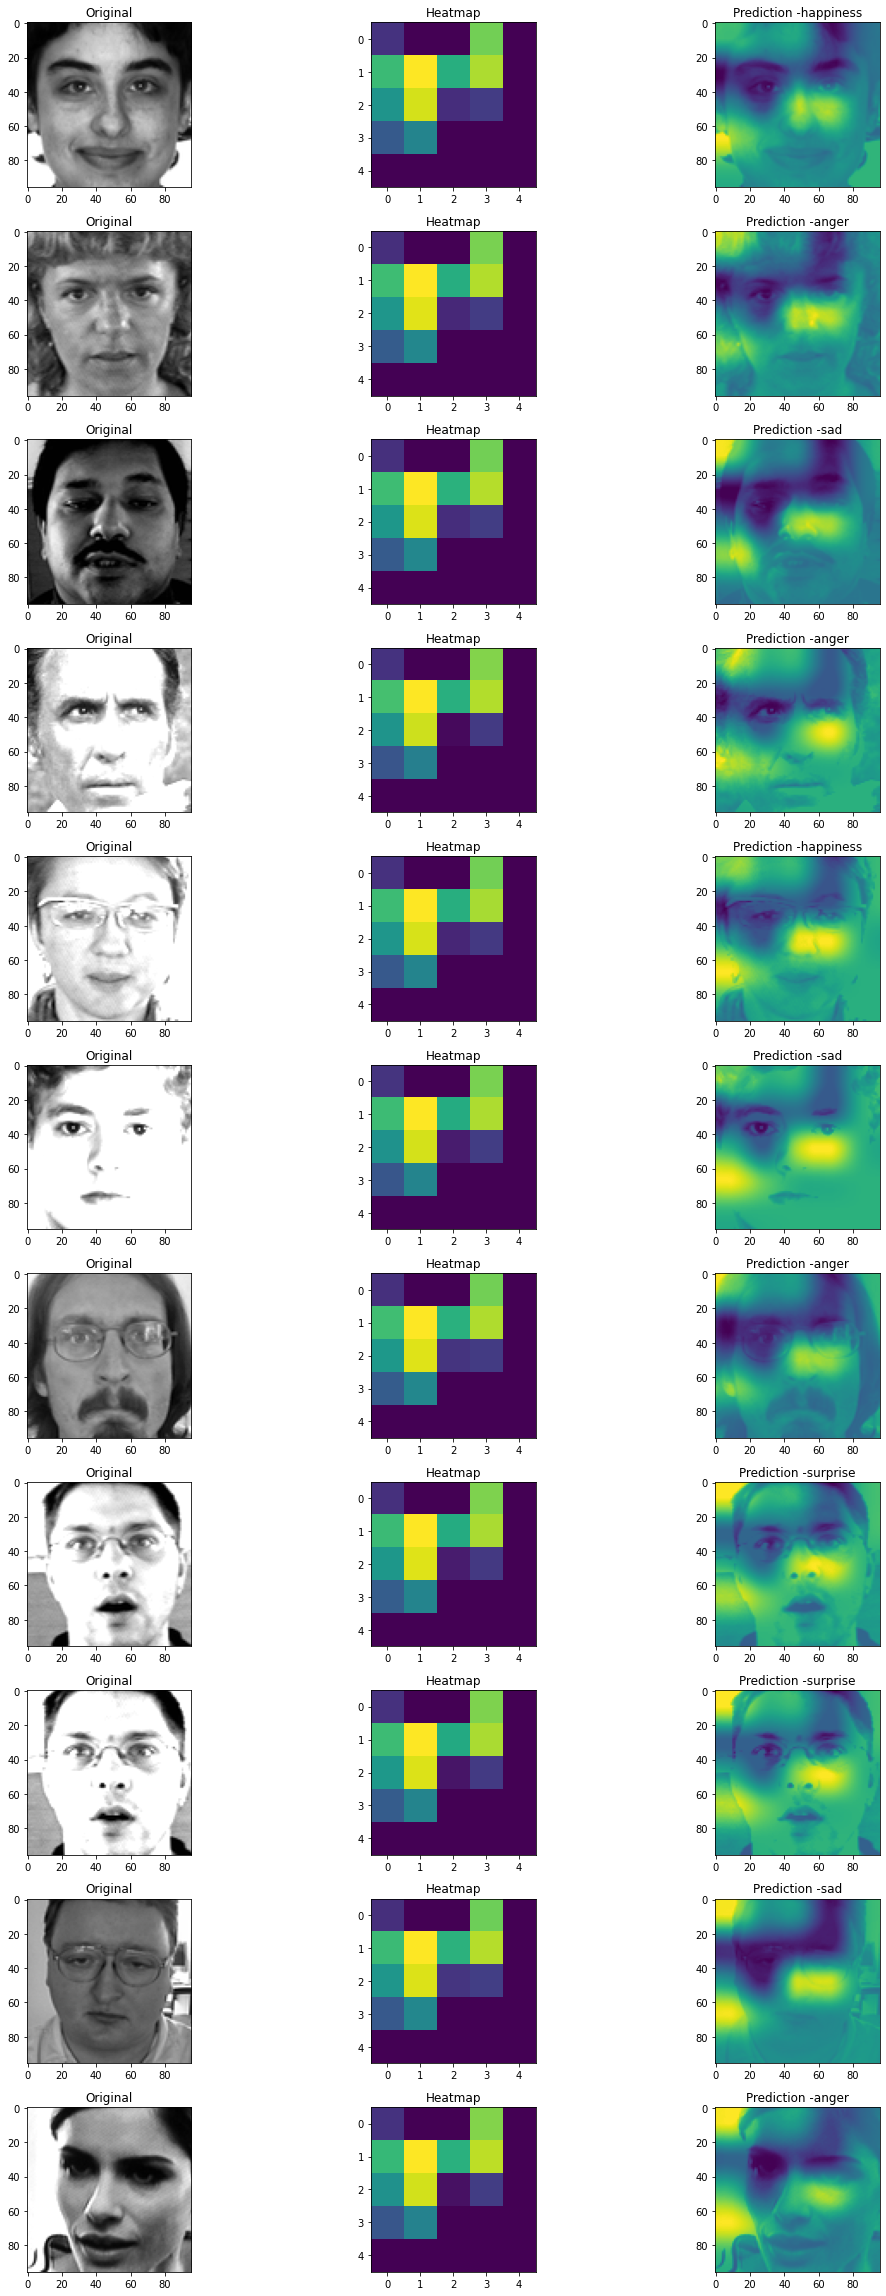

In [125]:
#Visualize the images in the dataset
import random
fig, axs = plt.subplots(11,3, figsize=(16,32))
count = 0
for i in range(11):
    #i = random.randint(0,len(X_test))
    gradcam, heatmap = grad_cam(X_test[i])
    axs[count][0].title.set_text("Original")
    axs[count][0].imshow(X_test[i].squeeze(),cmap = 'gray')
    axs[count][1].title.set_text("Heatmap") 
    axs[count][1].imshow(heatmap)
    axs[count][2].title.set_text("Prediction -" + label_to_text[df_predict['emotion'][i]]) 
    axs[count][2].imshow(gradcam)  
    count += 1

    fig.tight_layout()

- We now need to save our trained model and it has to be saved in a SavedModel format.
- The model will have a version number and will be saved in a structured directory 
- tf.saved_model.save is a function used to build a saved model that is suitable for serving using Tensorflow Serving. 
- After the model is saved, we can now use TensorFlow Serving to start making inference requests using a specific version of our trained model "servable".
- Use SavedModel to save and load your model—variables, the graph, and the graph's metadata. 
- This is a language-neutral, recoverable, hermetic serialization format that enables higher-level systems and tools to produce, consume, and transform TensorFlow models.
          
- For more information: 
https://www.tensorflow.org/guide/saved_model

In [96]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model):
    MODEL_DIR = directory
    version = 1 

    # Let's join the temp model directory with our chosen version number 
    # The expected result will be = '\tmp\version number'
    export_path = os.path.join(MODEL_DIR, str(version))
    print('export_path = {}\n'.format(export_path))

    # Let's save the model using saved_model.save
    # If the directory already exists, we will remove it using '!rm' 
    # rm removes each file specified on the command line. 

    if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

    tf.saved_model.save(model,export_path)

    os.environ["MODEL_DIR"] = MODEL_DIR

# SERVE THE MODEL USING TENSORFLOW SERVING

## Let's add tensorflow-model-server package to our list of packages 

In [1]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

'tee' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.


## Let's install tensorflow model server:

In [100]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 187 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.2.0 [187 MB]
Fetched 187 MB in 3s (66.0 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.2.0_all.deb ...
Unpacking tensorflow-model-server (2.2.0) ...
Setting up tensorflow-model-server (2.2.0) ...


## Let's run TensorFlow serving

- We will load our model and start making inferences (predictions) based on it.
- There are some important parameters:

  - rest_api_port: The port that you'll use for REST requests.
  - model_name: We'll use this in the URL of REST requests. We can choose any name
  - model_base_path: This is the path to the directory where we've saved your model.


In [98]:
deploy('/model',model)

export_path = /model/1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /model/1/assets


In [101]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [102]:
!tail server.log

2020-07-02 08:23:25.522731: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-07-02 08:23:25.584409: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-07-02 08:23:25.772661: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /model/1
2020-07-02 08:23:25.864231: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 369745 microseconds.
2020-07-02 08:23:25.874866: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /model/1/assets.extra/tf_serving_warmup_requests
2020-07-02 08:23:25.875202: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: keypoint_model version: 1}
2020-07-02

In [103]:
deploy('/model1',model_e)

export_path = /model1/1

INFO:tensorflow:Assets written to: /model1/1/assets


In [104]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [105]:
!tail server.log

2020-07-02 08:24:13.438867: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-07-02 08:24:13.501096: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-07-02 08:24:13.652234: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /model1/1
2020-07-02 08:24:13.732763: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 313922 microseconds.
2020-07-02 08:24:13.742873: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /model1/1/assets.extra/tf_serving_warmup_requests
2020-07-02 08:24:13.743269: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: emotion_model version: 1}
2020-07-0

- **Congratulations! now we have successfully loaded a servable version of our model {name: keypoint_model version: 1}** 
- **Congratulations! now we have successfully loaded a servable version of our model {name: emotion_model version: 1}** 

## Let's start making requests in TensorFlow Serving

In [106]:
import json

# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... [0.0031636697240173817], [0.0031636697240173817]]]]}


In [107]:
!pip install -q requests

In [111]:
import requests
#Function to make predictions from deployed models
def response(data):
    headers = {"content-type": "application/json"}
    json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
    df_predict = json.loads(json_response.text)['predictions']
    json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
    df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)
    #Reshaping array from (856,) to (856,1)
    df_emotion = np.expand_dims(df_emotion, axis = 1)

    #Converting the predictions into a dataframe
    df_predict= pd.DataFrame(df_predict, columns= columns)

    #Adding emotion into the predicted dataframe
    df_predict['emotion'] = df_emotion

    return df_predict

In [113]:
#making prediction
df_predict = response(data)

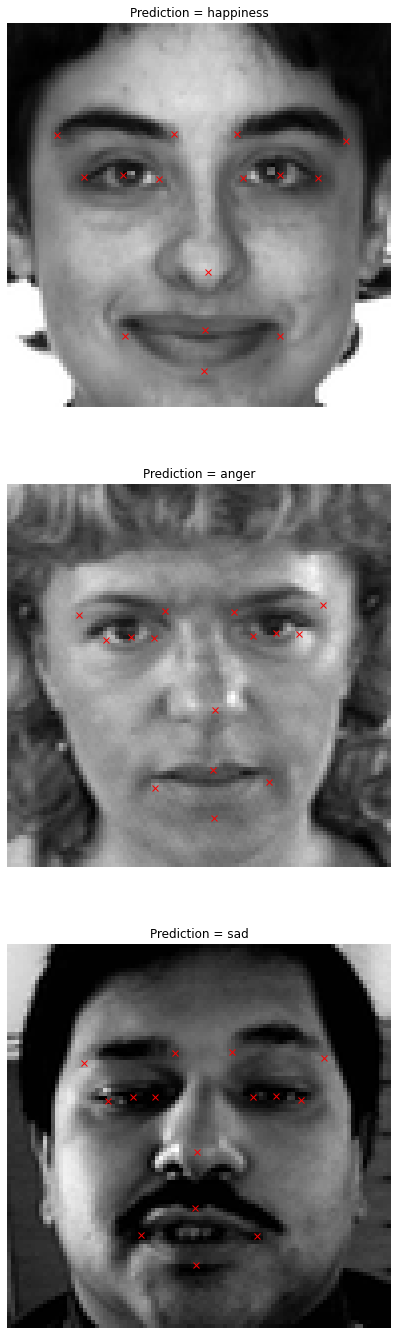

In [115]:
#Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
            